In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
  # Loading datasets
locations = pd.read_csv("https://raw.githubusercontent.com/gabriellecastilho/datasets/master/indonesia_tourism.csv")
ratings = pd.read_csv("https://raw.githubusercontent.com/gabriellecastilho/datasets/master/indonesia_tourism_rating.csv")
users = pd.read_csv("https://raw.githubusercontent.com/gabriellecastilho/datasets/master/indonesia_tourism_user.csv")

    # Merging / Joining datasets
main_table = pd.merge(ratings, users, on='User_Id', how='inner')
main_table = pd.merge(main_table, locations, on="Place_Id", how="inner")
main_table.head

<bound method NDFrame.head of       User_Id  Place_Id  Place_Ratings                    Location  Age  \
0           1       179              3       Semarang, Jawa Tengah   20   
1          22       179              4          Subang, Jawa Barat   25   
2          40       179              3       Semarang, Jawa Tengah   27   
3          49       179              5  Jakarta Pusat, DKI Jakarta   24   
4          74       179              3       Semarang, Jawa Tengah   30   
...       ...       ...            ...                         ...  ...   
9995      240       140              3         Cirebon, Jawa Barat   22   
9996      247       140              4          Bekasi, Jawa Barat   28   
9997      261       140              4             Yogyakarta, DIY   38   
9998      267       140              3       Semarang, Jawa Tengah   31   
9999      268       140              2             Yogyakarta, DIY   32   

           Place_Name                                        Descript

In [46]:
 data = main_table[["User_Id", "Place_Id", "Place_Name", "Age", "Category", "City", "Rating", "Place_Ratings", "Price"]]
 data

,User_Id,Place_Id,Place_Name,Age,Category,City,Rating,Place_Ratings,Price
0,1,179,Candi Ratu Boko,20,Budaya,Yogyakarta,4.6,3,75000
1,22,179,Candi Ratu Boko,25,Budaya,Yogyakarta,4.6,4,75000
2,40,179,Candi Ratu Boko,27,Budaya,Yogyakarta,4.6,3,75000
3,49,179,Candi Ratu Boko,24,Budaya,Yogyakarta,4.6,5,75000
4,74,179,Candi Ratu Boko,30,Budaya,Yogyakarta,4.6,3,75000
...,...,...,...,...,...,...,...,...,...
9995,240,140,Bendung Lepen,22,Taman Hiburan,Yogyakarta,4.6,3,0
9996,247,140,Bendung Lepen,28,Taman Hiburan,Yogyakarta,4.6,4,0
9997,261,140,Bendung Lepen,38,Taman Hiburan,Yogyakarta,4.6,4,0
9998,267,140,Bendung Lepen,31,Taman Hiburan,Yogyakarta,4.6,3,0


In [47]:
data.isnull().sum()

User_Id          0
Place_Id         0
Place_Name       0
Age              0
Category         0
City             0
Rating           0
Place_Ratings    0
Price            0
dtype: int64

In [48]:
data.dtypes

User_Id            int64
Place_Id           int64
Place_Name        object
Age                int64
Category          object
City              object
Rating           float64
Place_Ratings      int64
Price              int64
dtype: object

In [49]:
data.shape

(10000, 9)

In [50]:
duplicates = data[data.duplicated()]
print("number of duplicate rows: ", duplicates.shape)

number of duplicate rows:  (79, 9)


In [51]:
data=data.drop_duplicates()
data

,User_Id,Place_Id,Place_Name,Age,Category,City,Rating,Place_Ratings,Price
0,1,179,Candi Ratu Boko,20,Budaya,Yogyakarta,4.6,3,75000
1,22,179,Candi Ratu Boko,25,Budaya,Yogyakarta,4.6,4,75000
2,40,179,Candi Ratu Boko,27,Budaya,Yogyakarta,4.6,3,75000
3,49,179,Candi Ratu Boko,24,Budaya,Yogyakarta,4.6,5,75000
4,74,179,Candi Ratu Boko,30,Budaya,Yogyakarta,4.6,3,75000
...,...,...,...,...,...,...,...,...,...
9995,240,140,Bendung Lepen,22,Taman Hiburan,Yogyakarta,4.6,3,0
9996,247,140,Bendung Lepen,28,Taman Hiburan,Yogyakarta,4.6,4,0
9997,261,140,Bendung Lepen,38,Taman Hiburan,Yogyakarta,4.6,4,0
9998,267,140,Bendung Lepen,31,Taman Hiburan,Yogyakarta,4.6,3,0


In [52]:
data.count()

User_Id          9921
Place_Id         9921
Place_Name       9921
Age              9921
Category         9921
City             9921
Rating           9921
Place_Ratings    9921
Price            9921
dtype: int64

<Axes: xlabel='Price'>

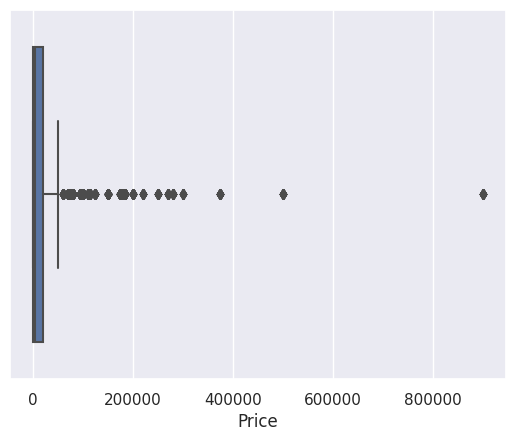

In [53]:
sns.boxplot(x=data['Price'])

<Axes: xlabel='Age'>

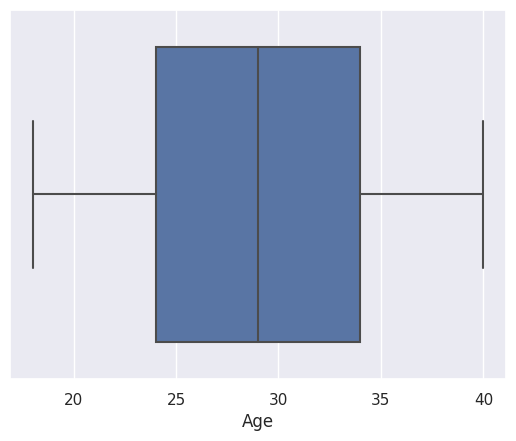

In [54]:
sns.boxplot(x=data['Age'])

<Axes: xlabel='Place_Ratings'>

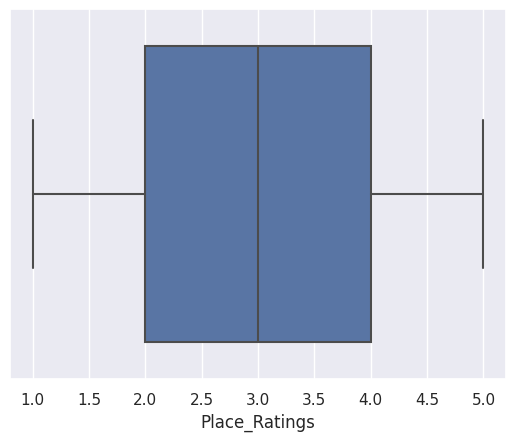

In [55]:
sns.boxplot(x=data['Place_Ratings'])

<Axes: xlabel='Rating'>

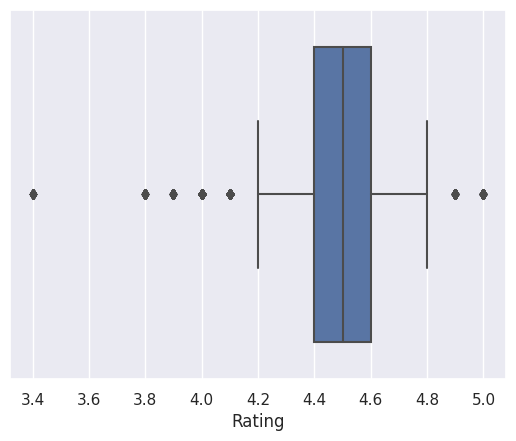

In [56]:
sns.boxplot(x=data['Rating'])

In [57]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

User_Id            149.0
Place_Id           220.0
Age                 10.0
Rating               0.2
Place_Ratings        2.0
Price            20000.0
dtype: float64


<ipython-input-57-3fa956ee7617>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-57-3fa956ee7617>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [58]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.head

<ipython-input-58-0fb0d2902feb>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


<bound method NDFrame.head of       User_Id  Place_Id              Place_Name  Age       Category  \
82          1       373  Museum Kereta Ambarawa   20         Budaya   
83         21       373  Museum Kereta Ambarawa   30         Budaya   
84         30       373  Museum Kereta Ambarawa   30         Budaya   
85         30       373  Museum Kereta Ambarawa   30         Budaya   
86         42       373  Museum Kereta Ambarawa   37         Budaya   
...       ...       ...                     ...  ...            ...   
9995      240       140           Bendung Lepen   22  Taman Hiburan   
9996      247       140           Bendung Lepen   28  Taman Hiburan   
9997      261       140           Bendung Lepen   38  Taman Hiburan   
9998      267       140           Bendung Lepen   31  Taman Hiburan   
9999      268       140           Bendung Lepen   32  Taman Hiburan   

            City  Rating  Place_Ratings  Price  
82      Semarang     4.5              3  10000  
83      Semarang   

<Axes: xlabel='Rating'>

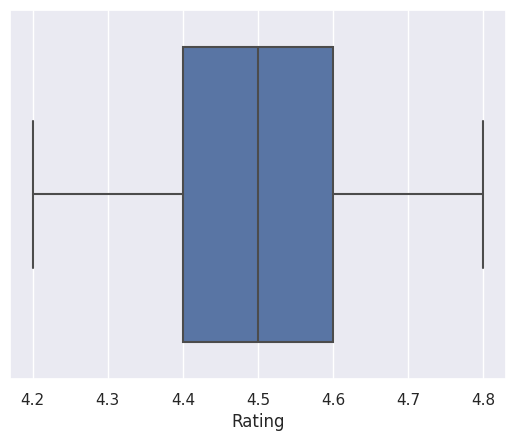

In [59]:
sns.boxplot(x=data['Rating'])

<Axes: xlabel='Price'>

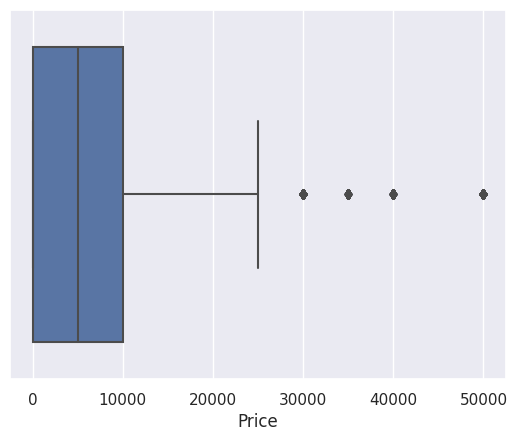

In [60]:
sns.boxplot(x=data['Price'])

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [62]:
def translate_category(item):
  if item == "Taman Hiburan": return "Amusement Park"
  elif item == "Tempat Ibadah": return "Place of Worship"
  elif item == "Budaya": return "Culture"
  elif item == "Cagar Alam": return "Natural Reserve"
  elif item == "Bahari": return "Nautical"
  elif item == "Pusat Perbelanjaan": return "Shopping Center"

data["Category"] = data["Category"].apply(translate_category)


<ipython-input-62-cd975d867676>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Category"] = data["Category"].apply(translate_category)


Text(0.5, 0, 'Category')

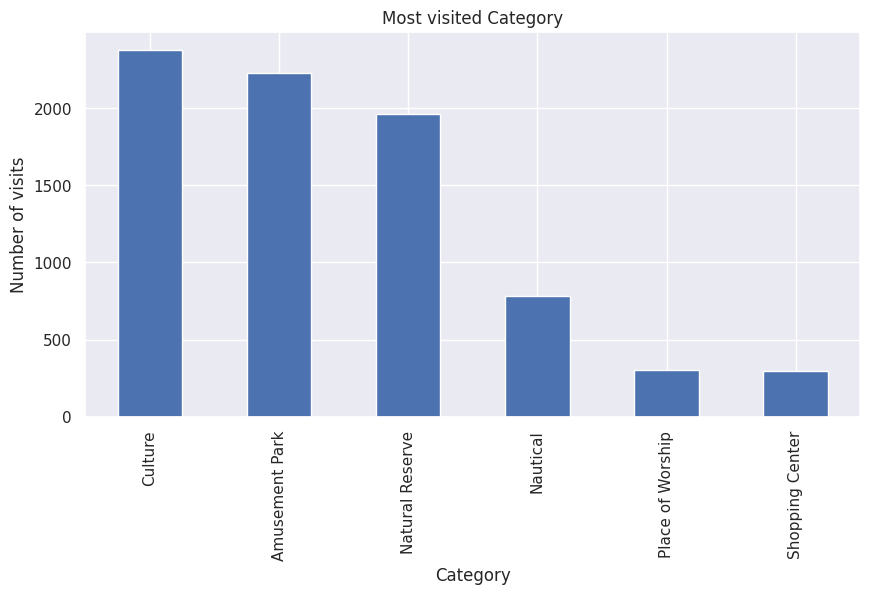

In [63]:

data.Category.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Most visited Category")
plt.ylabel('Number of visits')
plt.xlabel('Category')

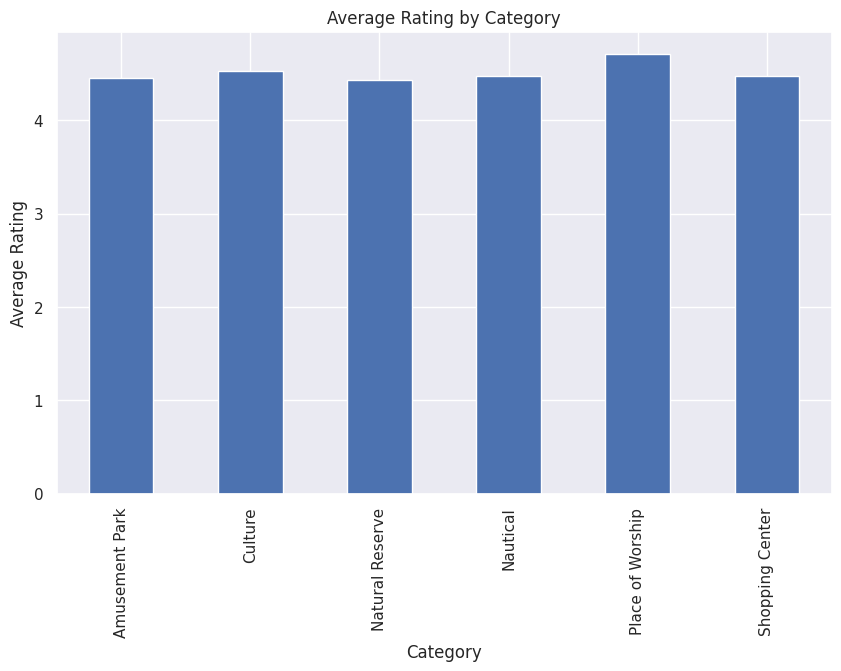

In [64]:
Avg_rating = data.groupby('Category')['Rating'].mean()

plt.figure(figsize=(10, 6))
Avg_rating.plot(kind='bar')
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

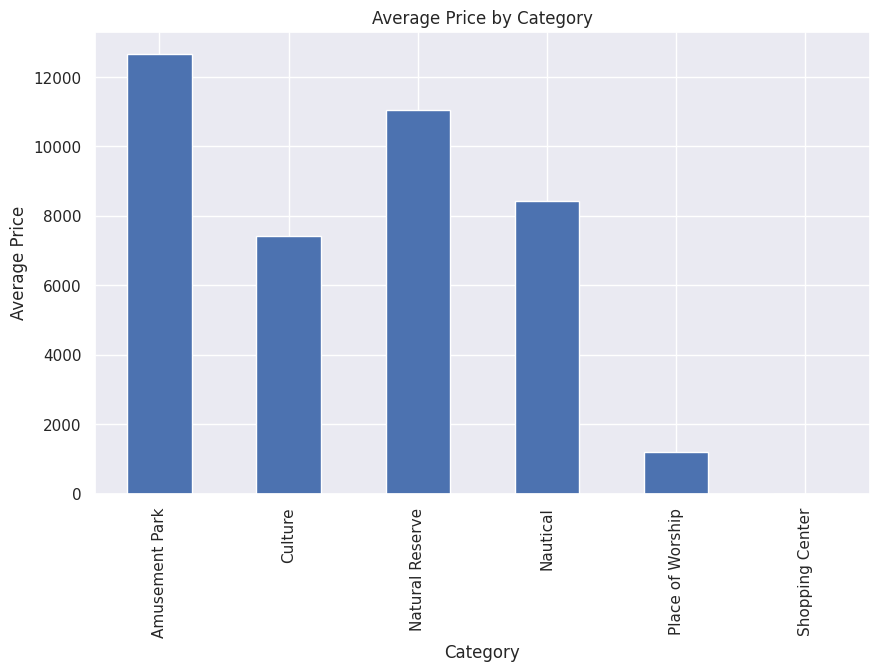

In [65]:

Avg_price = data.groupby('Category')['Price'].mean()

plt.figure(figsize=(10, 6))
Avg_price.plot(kind='bar')
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.show()

<ipython-input-66-2dc6a5b7eb96>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  most_visited_by_age = age_category_counts.groupby('Age')['Category', 'Count'].agg({'Category': 'first', 'Count': 'max'}).reset_index()


<Figure size 1200x600 with 0 Axes>

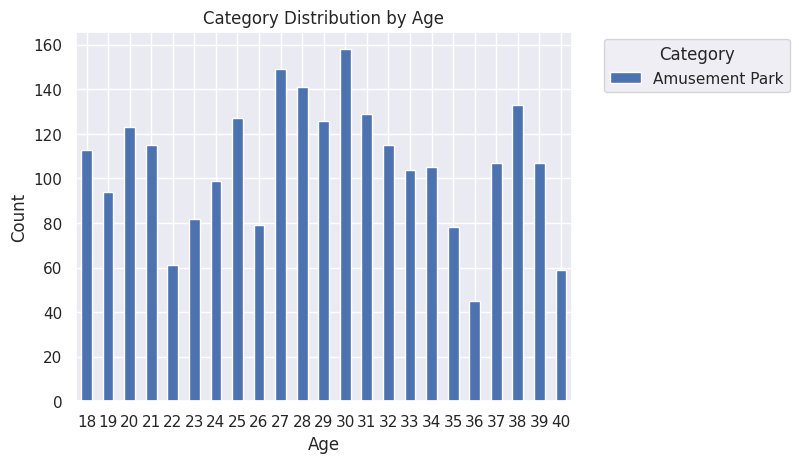

In [66]:
age_category_counts = data.groupby(['Age', 'Category']).size().reset_index(name='Count')

most_visited_by_age = age_category_counts.groupby('Age')['Category', 'Count'].agg({'Category': 'first', 'Count': 'max'}).reset_index()

pivot_table = most_visited_by_age.pivot(index='Age', columns='Category', values='Count')

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.title("Category Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()